## Model Representation
<img align="left" src="../images/C1_W1_L3_S1_Lecture_b.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S1_trainingdata.png"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S1_model.png"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L3_S2_Lecture_b.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:96%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_L4_S1_Lecture_GD.png"    style=" width:96%; height:250px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_lecture_slopes.PNG"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_lecture_learningrate.PNG"    style=" width:47%; height:200px; padding: 10px;  " />
<img align="left" src="../images/C1_W1_Lab03_alpha_too_big.PNG"    style=" width:96%; height:250px; padding: 10px;  " />

In [100]:
# imoprting packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_gradients, plt_divergence

In [55]:
# Reading Files
df = pd.read_csv('./data.csv')
df.columns = df.columns.str.lower().str.replace(' ','_') # Modifying Headings

# list_of_head = list(df.dtypes[df.dtypes != 'object'].index)
# list_of_head

# Filling up null values
df['engine_hp'].fillna(round(df['engine_hp'].mean(),2),inplace=True)

#Creating datasets
x_feature = df['engine_hp'].iloc[:100]
y_target = df['msrp'].iloc[:100]
# df['msrp'].isnull().sum()
# for col in list_of_head:
#     df[col] = df[col].str.lower().str.replace(' ', '_')
# for col in df.columns:
#     print(df[col].unique()[:5])
#     print(df[col].nunique())
#     print()
# x_feature

In [45]:
## Cost function 

# w11 = 100
# b11 = 51
# x11 = np.array([1.0, 2.0, 3.0])
# y11 = np.array([150, 250, 350])

def cost_function(x, y, w, b):
    # print(x)
    m = x.shape[0]
    cost = 0

    # Looping for cost
    for i in range(m):
        f_wb = (w * x[i]) + b
        cost += (f_wb - y[i]) ** 2
    j_wb = (1/(2*m)) * cost
    return j_wb
# cost_function(x_feature, y_target, w11, b11)
# print(j_wb)

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [46]:
### Compute gradient
def gradient_deriv(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    #Looping for gradient derivative
    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
# gradient_deriv(x_feature, y_target, w11, b11)

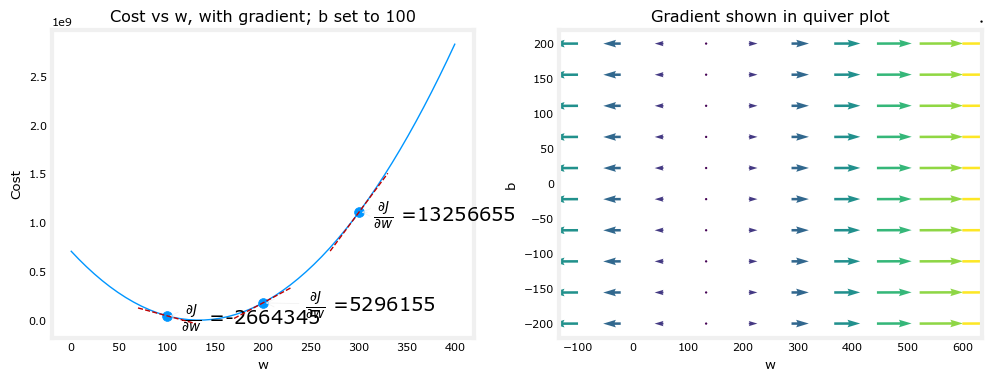

In [47]:
plt_gradients(x_feature,y_target, cost_function, gradient_deriv)
plt.show()

In [61]:
# Computing gradient descent
def gradient_descent(x, y, w_ini, b_ini, alpha, num_iteration, cost_func, grad_deriv):
    w = w_ini
    b = b_ini
    cost_hist = []
    coef_hist = []

    # Looping for gradient descent
    for i in range(num_iteration):
        dj_dw, dj_db = grad_deriv(x, y, w, b)

        #Calculating weight and bias
        w += -(alpha * dj_dw) 
        b += -(alpha * dj_db)

        # Storing up the values
        if i<num_iteration:
            cost_hist.append(cost_func(x, y, w, b))
            coef_hist.append([w, b])
        
        # Storing up the itarations
        if i% math.ceil(num_iteration/10) == 0:
            print(f"Iteration - {i:4} : cost - {cost_hist[-1]:0.2e}", f"  dj_dw - {dj_dw: 0.3e} : dj_db - {dj_db: 0.3e}", f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, cost_hist, coef_hist

In [95]:
# Setting up the initial values
w_init = 0
b_init = 0
tmp_alpha = 1.0e-5
iterations = 1000000

# Calculating the values and unpacking the values
w_final, b_final, cost_hist, coef_hist = gradient_descent(x_feature, y_target, w_init, b_init, tmp_alpha, iterations, cost_function, gradient_deriv)

#Prnting final values
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration -    0 : cost - 1.47e+08   dj_dw - -5.476e+06 : dj_db - -2.140e+04 w:  5.476e+01, b: 2.14011e-01


Iteration - 100000 : cost - 6.25e+07   dj_dw - -8.900e+00 : dj_db -  2.061e+03 w:  1.210e+02, b:-2.15175e+03
Iteration - 200000 : cost - 5.86e+07   dj_dw - -8.169e+00 : dj_db -  1.892e+03 w:  1.295e+02, b:-4.12703e+03
Iteration - 300000 : cost - 5.53e+07   dj_dw - -7.497e+00 : dj_db -  1.736e+03 w:  1.373e+02, b:-5.93992e+03
Iteration - 400000 : cost - 5.26e+07   dj_dw - -6.881e+00 : dj_db -  1.594e+03 w:  1.445e+02, b:-7.60378e+03
Iteration - 500000 : cost - 5.02e+07   dj_dw - -6.315e+00 : dj_db -  1.463e+03 w:  1.511e+02, b:-9.13085e+03
Iteration - 600000 : cost - 4.83e+07   dj_dw - -5.796e+00 : dj_db -  1.342e+03 w:  1.572e+02, b:-1.05324e+04
Iteration - 700000 : cost - 4.66e+07   dj_dw - -5.319e+00 : dj_db -  1.232e+03 w:  1.627e+02, b:-1.18187e+04
Iteration - 800000 : cost - 4.52e+07   dj_dw - -4.882e+00 : dj_db -  1.131e+03 w:  1.678e+02, b:-1.29993e+04
Iteration - 900000 : cost - 4.40e+07   dj_dw - -4.481e+00 : dj_db -  1.038e+03 w:  1.725e+02, b:-1.40828e+04
(w,b) found by grad

In [104]:
# plt_divergence(coef_hist, cost_hist, x_feature, y_target)
# plt.show()

In [97]:
# Creating function for ploting
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

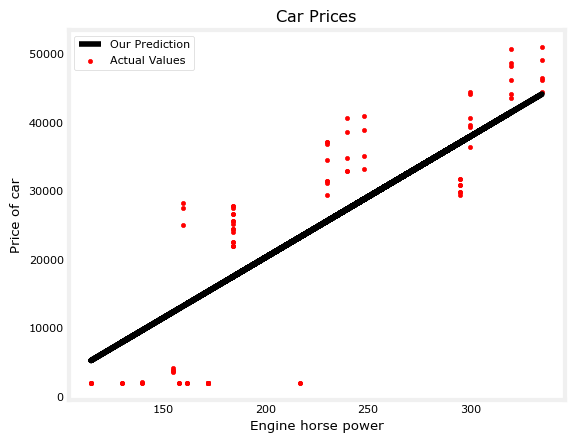

In [103]:
# Computing values
tmp_f_wb = compute_model_output(x_feature, w_final, b_final)


# Plot our model prediction
plt.plot(x_feature, tmp_f_wb, c='black',label='Our Prediction')

# Plot the data points
plt.scatter(x_feature, y_target, marker='.', c='r',label='Actual Values')

# Set the title
plt.title("Car Prices")
# Set the y-axis label
plt.ylabel('Price of car')
# Set the x-axis label
plt.xlabel('Engine horse power')
plt.legend()
plt.show()
# tmp_f_wb